<a href="https://colab.research.google.com/github/chessterfries/c122/blob/main/C122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(pd.Series(y).value_counts())
classes = ['0', '1' '2', '3', '4', '5', '6', '7', '8', '9']
nclasses = len(classes)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64


ValueError: ignored

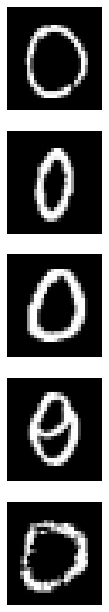

In [9]:
samples_per_class = 5
figure = plt.figure(figsize=(n_classes*2, (1+samples_per_class*2)))

idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i * n_classes + idx_cls + 1
    p = plt.subplot(samples_per_class, n_classes, plt_idx)
    p = sns.heatmap(np.array(X.loc[idx]).reshape(28, 28), cmap = plt.cm.gray, xticklabels=False, yticklabels=False, cbar = False)
    p = plt.axis('off')
    i += 1
  idx_cls += 1

In [12]:
samples_per_class = 5
figure = plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)))
idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples_per_class, nclasses, plt_idx);
    p = sns.heatmap(np.array(X.loc[idx]).reshape(28,28), cmap=plt.cm.gray, xticklabels=False, yticklabels=False, cbar=False);
    p = plt.axis('off');
    i += 1
  idx_cls += 1

TypeError: ignored

<Figure size 1296x792 with 0 Axes>

In [13]:
print(len(X))
print(len(X.loc[0]))

70000
784


In [14]:
print(X.loc[0])
print(y.loc[0])

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64
5


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9, train_size = 7500, test_size = 2500)
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [16]:
clf = LogisticRegression(solver='saga', multi_class='multinomial').fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [17]:
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9004


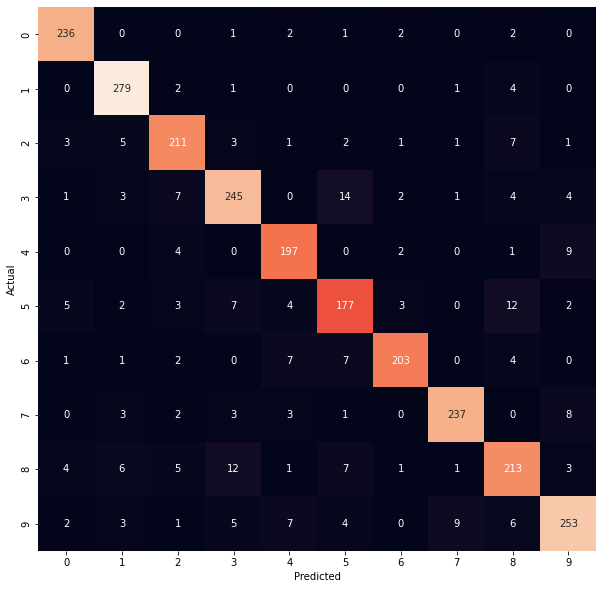

In [18]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
p = plt.figure(figsize=(10, 10))
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)